# **3. Analytical Approach**

## 3.1 EDA (Exploratory Data Analysis)

### 3.1.1 Import libraries dan Dataset

In [210]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import warnings

In [211]:
#Load Dataset
Data = pd.read_csv('AutoInsurance.csv')
Data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [212]:
# convert 'Effective To Date' to datetime
Data['Month'] = pd.DatetimeIndex(Data['Effective To Date']).month
Data['Month'] = Data['Month'].astype(str)

### 3.1.2 Define Numerical and Categprical Column from Dataset

In [213]:
# Define numerical & categorical features
numerical_features = [feature for feature in Data.columns if ((Data[feature].dtypes != 'O') )]
categorical_features = [feature for feature in Data.columns if ((Data[feature].dtypes == 'O'))]
categorical_features

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Month']

In [214]:
numerical_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [215]:
# Explore categorical features to see how many category in each features
Data.describe(include=['O']) 

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Month
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3,12
top,ND80148,California,No,Basic,Bachelor,10/1/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,1
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424,3356


In [216]:
Data[numerical_features].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 3.1.3 Distributon for Numerical Features and Nornal Distribution Test

In [217]:
warnings.filterwarnings("ignore")

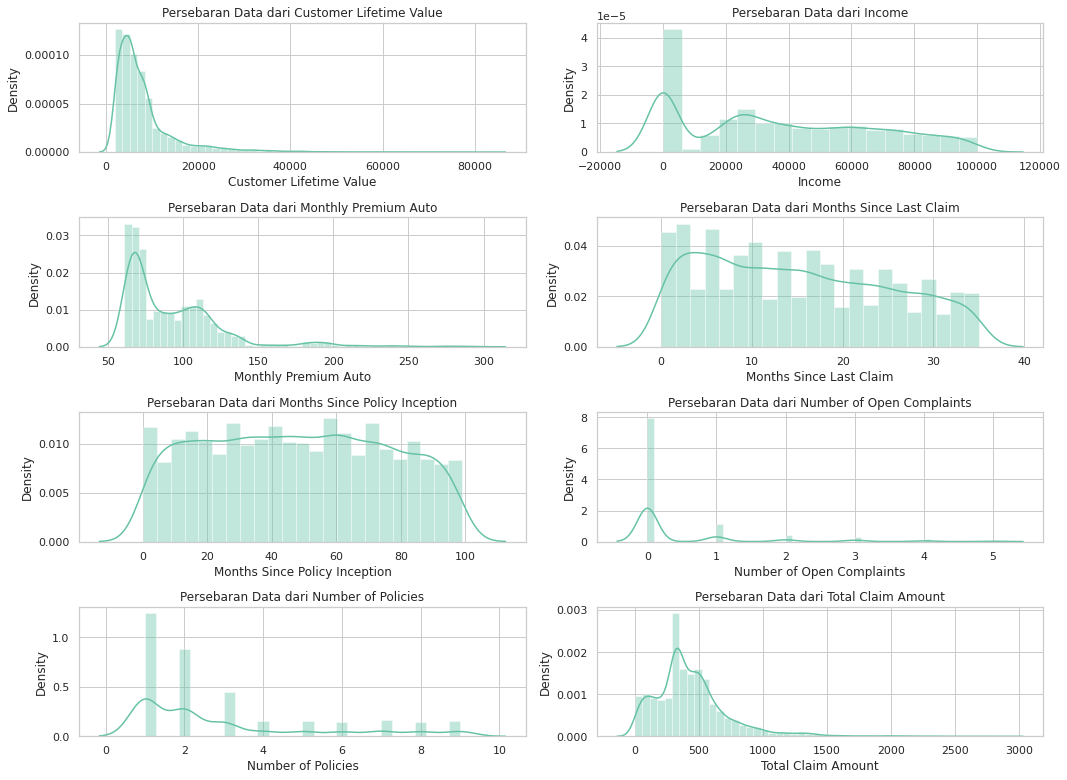

In [218]:
# Distribution Data for Numerical Features

plt.figure(figsize=(15, 11))
sns.set(style='whitegrid', palette='Set2')

numerical_codes = {}

for i in range(len(numerical_features)):
    numerical_codes[numerical_features[i]] = i

for features, i in numerical_codes.items():
    plt.subplot(4, 2, i+1)
    plt.title('Persebaran Data dari '+ features)
    sns.distplot(Data[features])


plt.tight_layout()

In [219]:
# Perform normality test for numerical features to check data distribution
from scipy import stats

num = 0

for i in numerical_features:
    k2, p = stats.normaltest(Data[i])
    alpha = 0.05
    
    num += 1
    print(f'{num}. p-value {i} = {p}')
    
    if p < alpha:
        print('The null hypothesis can be rejected')
        print()
    else:
        print('The null hypothesis cannot be rejected')
        print()

1. p-value Customer Lifetime Value = 0.0
The null hypothesis can be rejected

2. p-value Income = 0.0
The null hypothesis can be rejected

3. p-value Monthly Premium Auto = 0.0
The null hypothesis can be rejected

4. p-value Months Since Last Claim = 0.0
The null hypothesis can be rejected

5. p-value Months Since Policy Inception = 0.0
The null hypothesis can be rejected

6. p-value Number of Open Complaints = 0.0
The null hypothesis can be rejected

7. p-value Number of Policies = 0.0
The null hypothesis can be rejected

8. p-value Total Claim Amount = 0.0
The null hypothesis can be rejected



Kesimpulan :
1. Berdasarkan uji normalitas, fitur numerical memiliki persebaran data yang tidak normal
2. Terlihat dari diagram, persebaran data pada fitur 'Customer Lifetime Value', 'Total Claim Amount' cenderung skew left

### 3.1.4 Count every value in Categorical Features

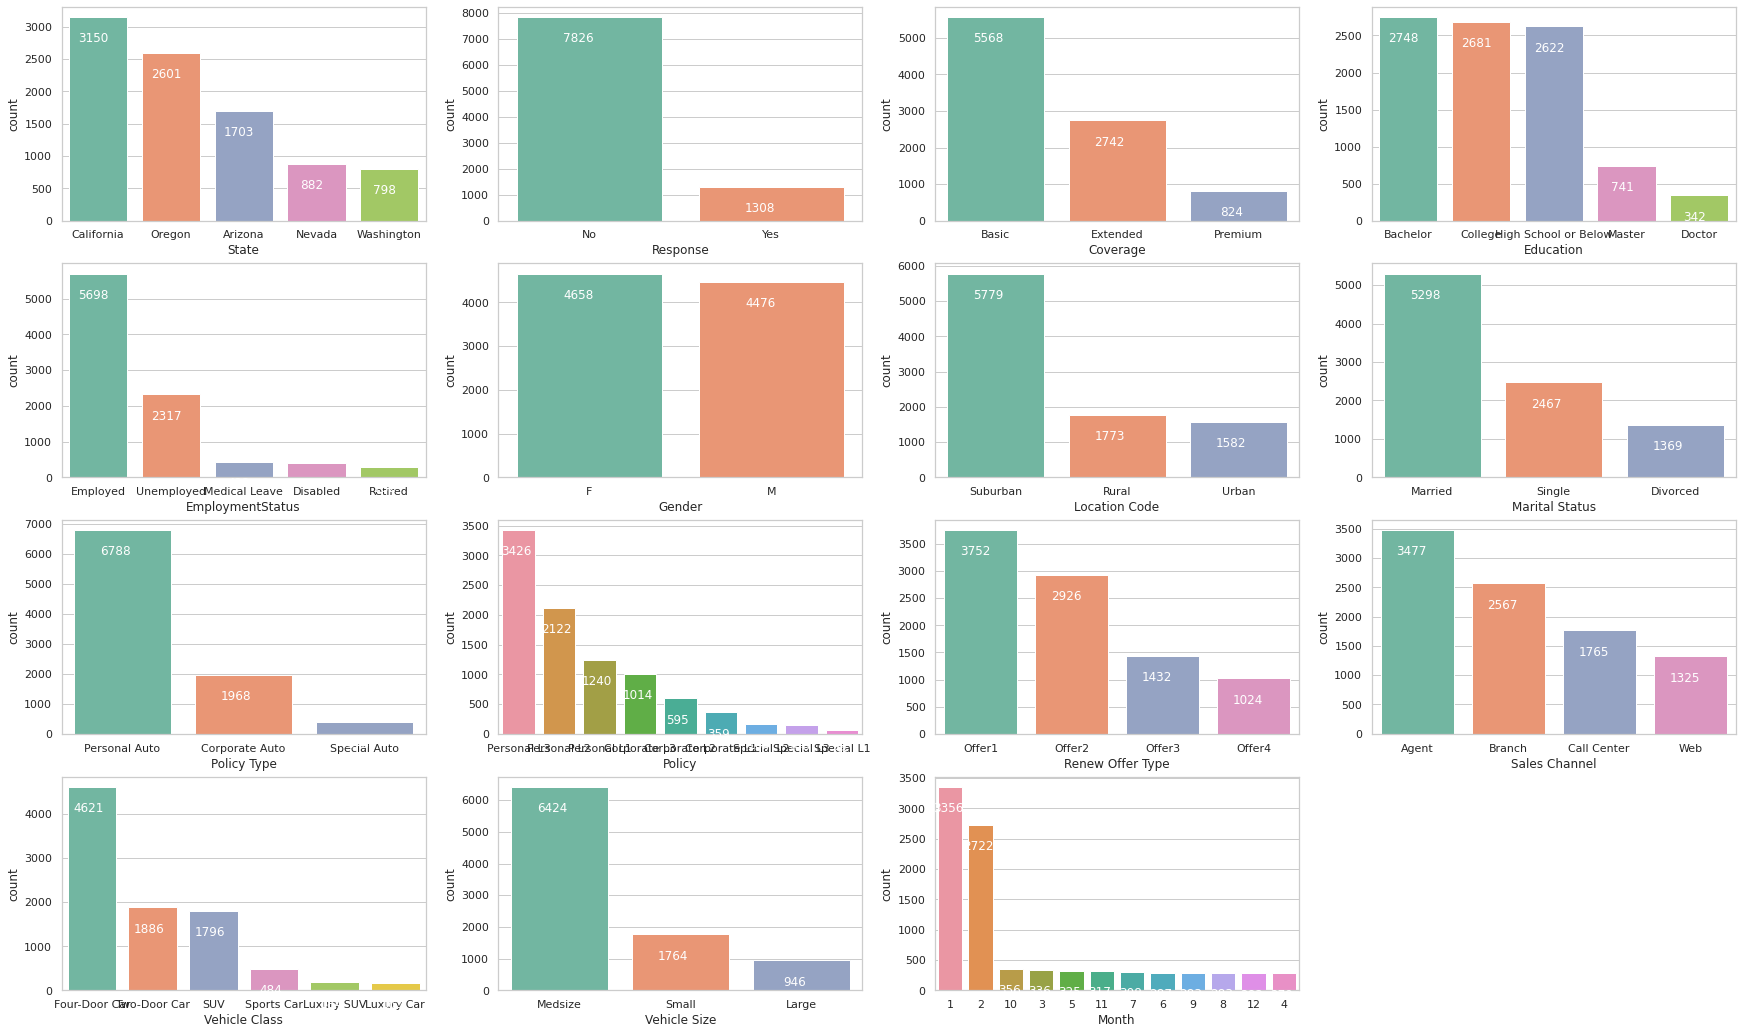

In [220]:
# Count Data for Categorical Features

categorical_features = ['State','Response','Coverage','Education','EmploymentStatus', 'Gender',
'Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size','Month']

plt.figure(figsize=(30, 70), facecolor='white')
sns.set(style='whitegrid', palette='Set2')
plotnumber = 1

for categorical_feature in categorical_features:
    ax = plt.subplot(15, 4, plotnumber)
    sns.countplot (x = categorical_feature , data = Data, order = Data[categorical_feature].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.34, p.get_height()-1), ha='center', va='top', color='white', size=12)
    plt.xlabel(categorical_feature)
    plotnumber += 1
plt.show()

Kesimpulan berdasarkan grafik column yang bersifat Categorical:
1. Berdasarkan Education, Customer dengan latar pendidikan 'Master' dan 'Dokter' yang paling sedikit jumlahnya
3. Beberapa kolom dimana jumlah salah satu value mendominasi ( >60% ) adalah 'Coverage' , 'Employment Status', 'Location Code' , 'Policy Type', ' Vehicle Size'
3. Data Effective Date terbanyak pada bulan Jan disusul Feb 



Melihat apakah ada kecenderungan kenaikan numerical value di bulan tertentu terhitung pada effective date

In [221]:
numfeature = ['Customer Lifetime Value', 'Monthly Premium Auto','Income','Months Since Policy Inception','Number of Open Complaints','Total Claim Amount']

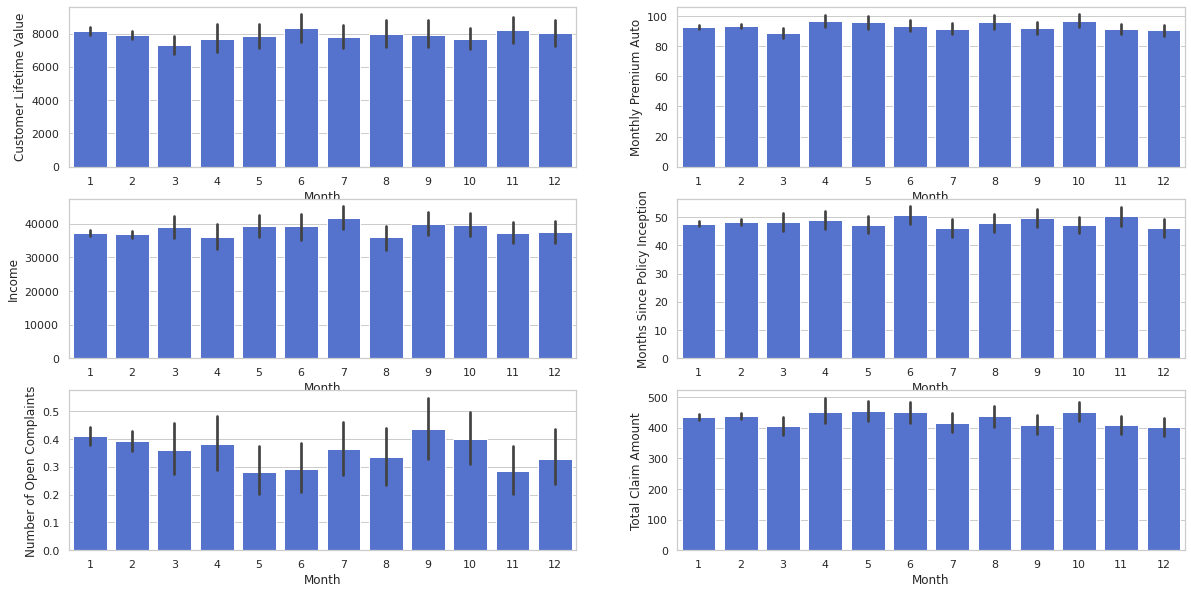

In [222]:
#Correlation between Month and Numerical Features
order = ['1','2','3','4','5','6','7','8','9','10','11','12']
plt.figure(figsize=(20, 10), facecolor='white')
i = 0
plotnumber =1
for fitur in numfeature:
    plt.subplot(3, 2, plotnumber)
    sns.barplot(data = Data, x = 'Month', y = numfeature[i] , order = order,color='royalblue')
    plotnumber+=1
    i+=1
plt.show()

Kesimpulan :
1. Jika diambil bulannya dari tiap effective date maka tidak ada pengaruh bulan disetiap kolom yang bersifar numerical
2. Jika estimator plot diubah menjadi sum maka sudah dipastikan Jan - Feb paling tinggi dikarenakan jumlah data dari jan - feb mewakili lebi dari 60%

### 3.1.5 Correlation with scatterplot

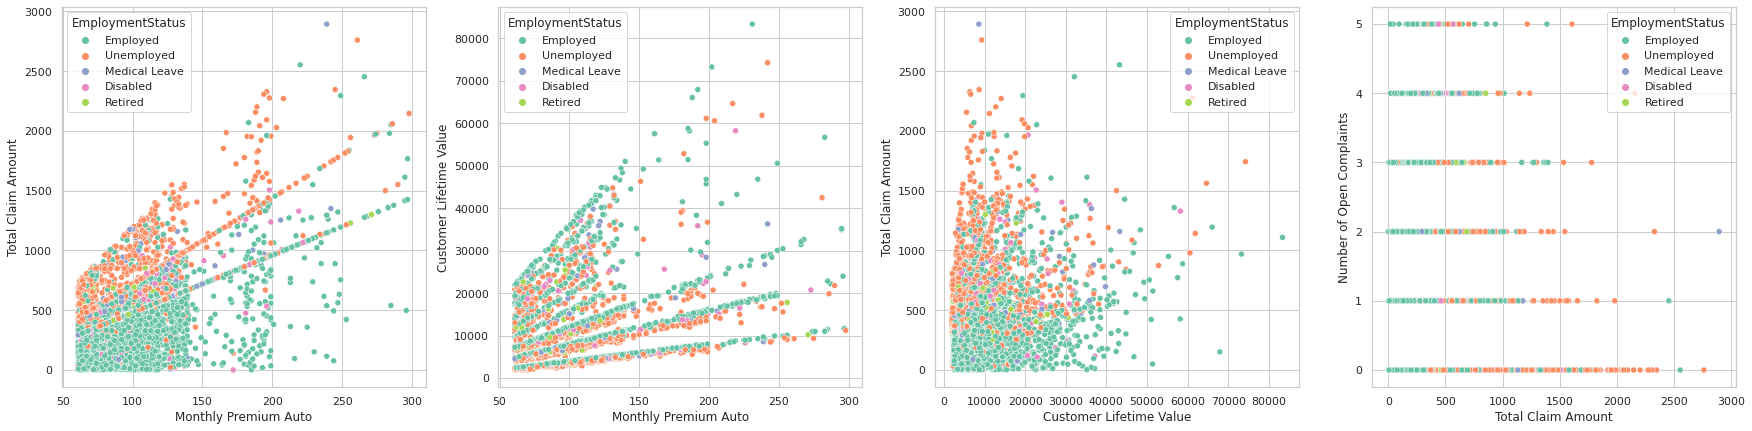

In [223]:
#Correlation between numerical features and Employment Status

x = 'EmploymentStatus'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

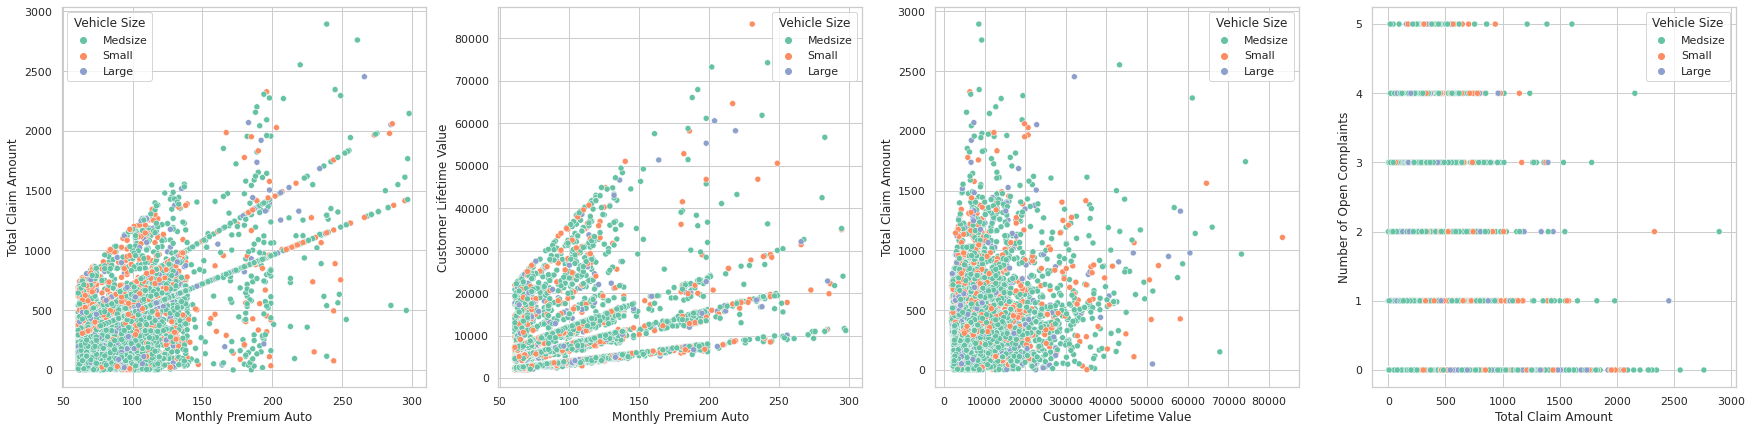

In [224]:
#Correlation between numerical features and Vehicle Size

x = 'Vehicle Size'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

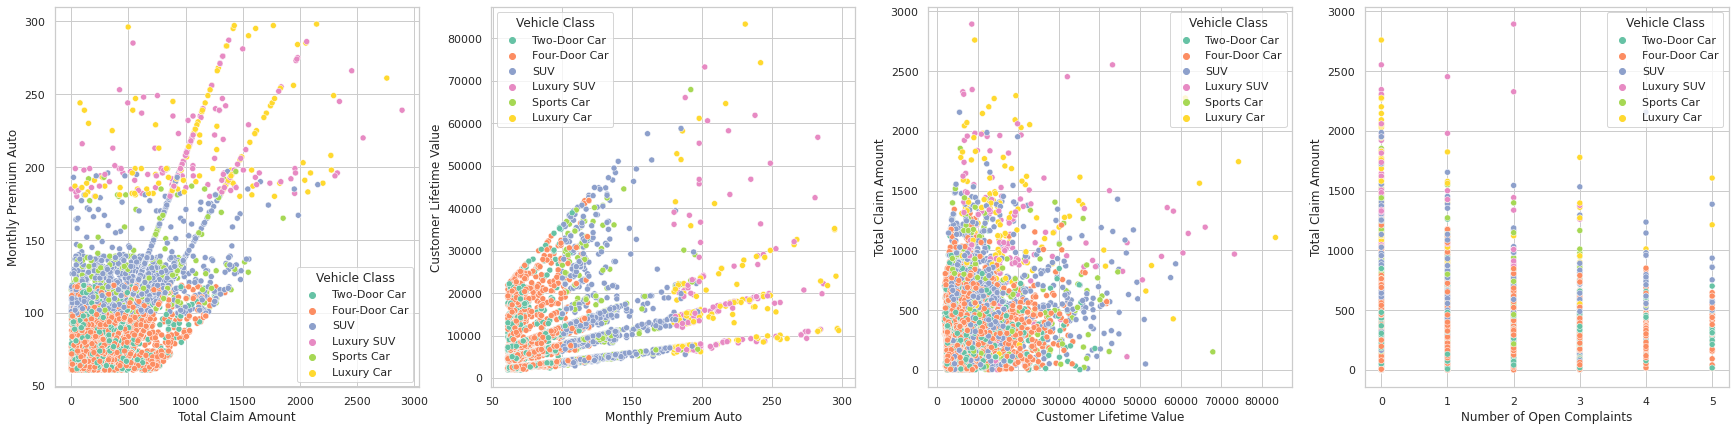

In [225]:
#Correlation between numerical features and Vehicle Class

x = 'Vehicle Class'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Total Claim Amount", y="Monthly Premium Auto", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Number of Open Complaints", y='Total Claim Amount', data=Data, ax= ax4,hue = x)

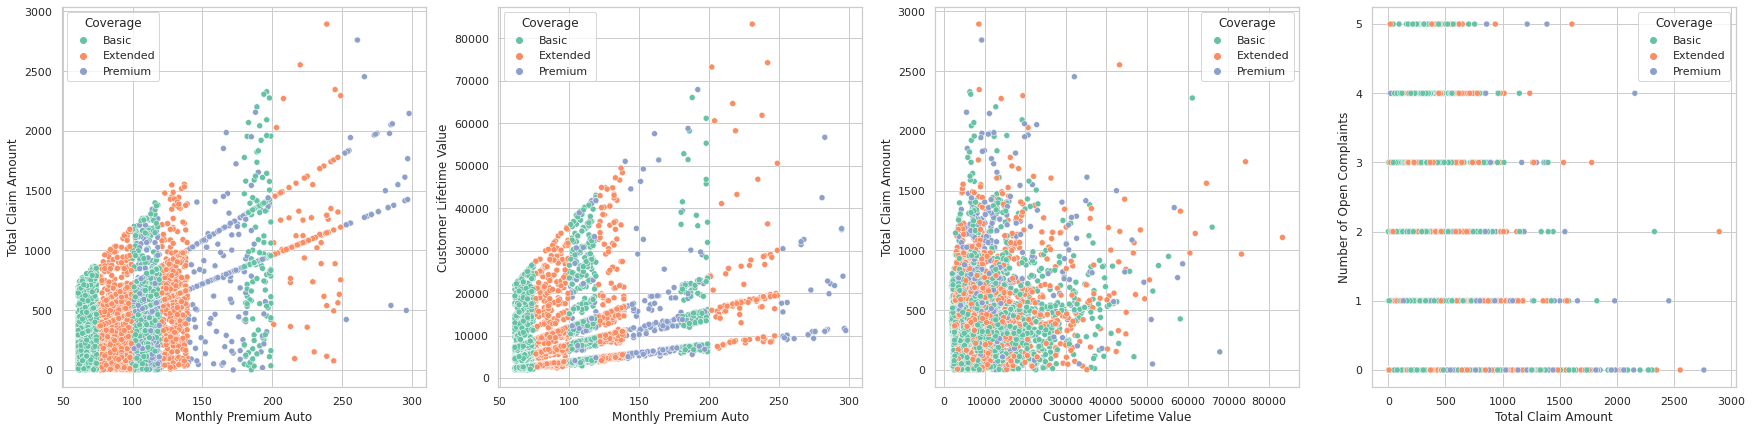

In [226]:
# Correlation between numerical features and Coverage
x = 'Coverage'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

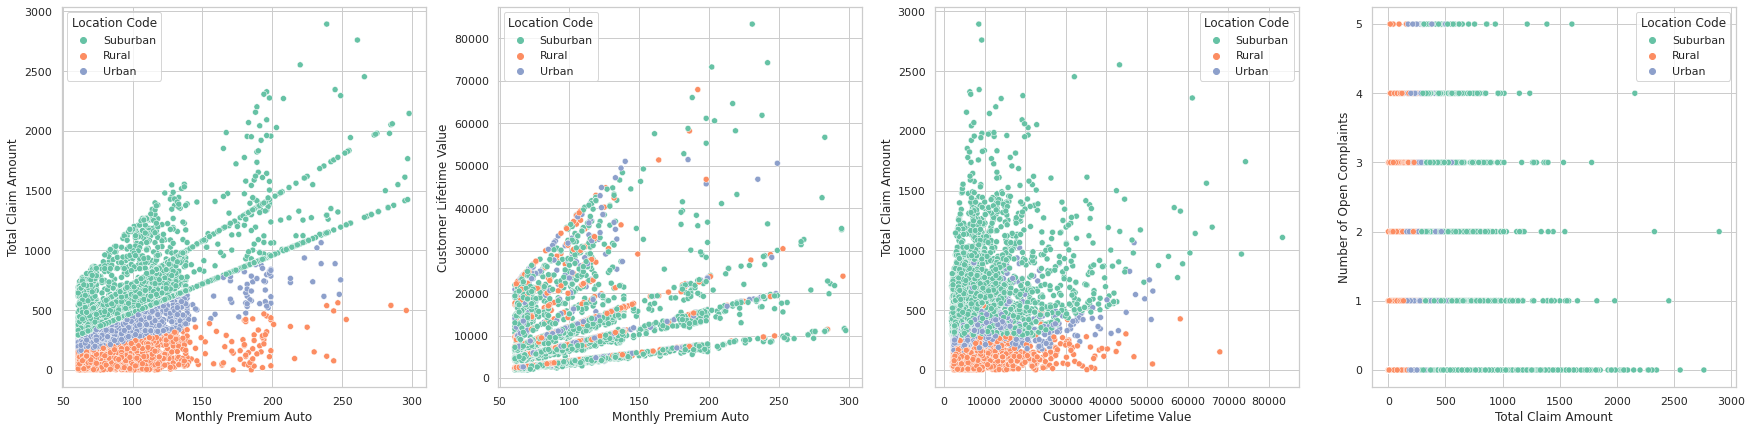

In [227]:
# Correlation between numerical features and Location Code
x = 'Location Code'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

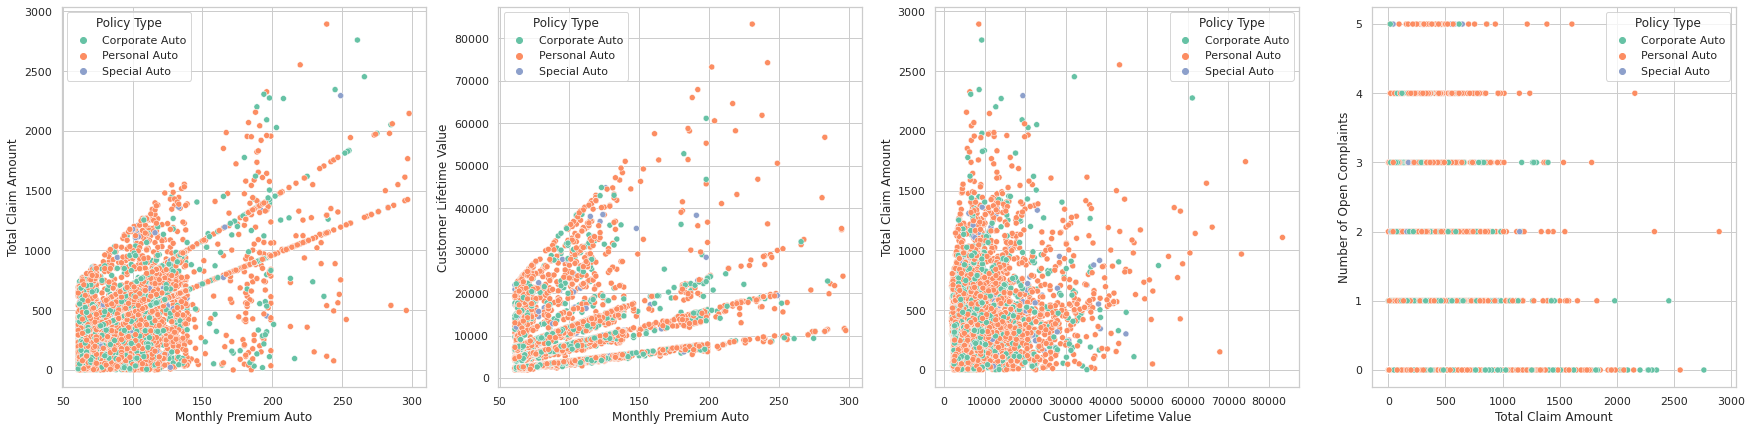

In [228]:
# Correlationn between numerical features and Policy Type

x = 'Policy Type'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

Kesimpulan Scatter plot :

1. Kecenderungan pada unemployed lebih besar untuk dilihat untuk Total Claim Amount dan Monthly Premium dibanding dengan employed
2. Vehicle Class dengan segmen luxury baik luxury Car maupun Luxury SUV cenderung untuk memiliki monthly premium auto yang besar dibandungkan Class yang lain
3. Kecenderungan pada Suburban lebih besar untuk dilihat dari Total Claim Amount dan Monthly Premium dibanding dengan rural maupun urban
4. Terdapat segementasi yang jelas dari coverage vs monthly premium auto, terlihat bahwa ada range untuk setiap coverage namun belum bisa menemukan apa yang menyebabkan segmentasi ini.

In [229]:
Data.groupby(['Vehicle Class','Coverage'])['Monthly Premium Auto'].agg('mean')

Vehicle Class  Coverage
Four-Door Car  Basic        67.515564
               Extended     87.372773
               Premium     109.893617
Luxury Car     Basic       188.760870
               Extended    225.714286
               Premium     279.500000
Luxury SUV     Basic       190.627660
               Extended    222.593750
               Premium     271.576923
SUV            Basic       109.311549
               Extended    129.782609
               Premium     167.060000
Sports Car     Basic       109.832192
               Extended    131.110345
               Premium     168.234043
Two-Door Car   Basic        67.386248
               Extended     87.788043
               Premium     110.544872
Name: Monthly Premium Auto, dtype: float64

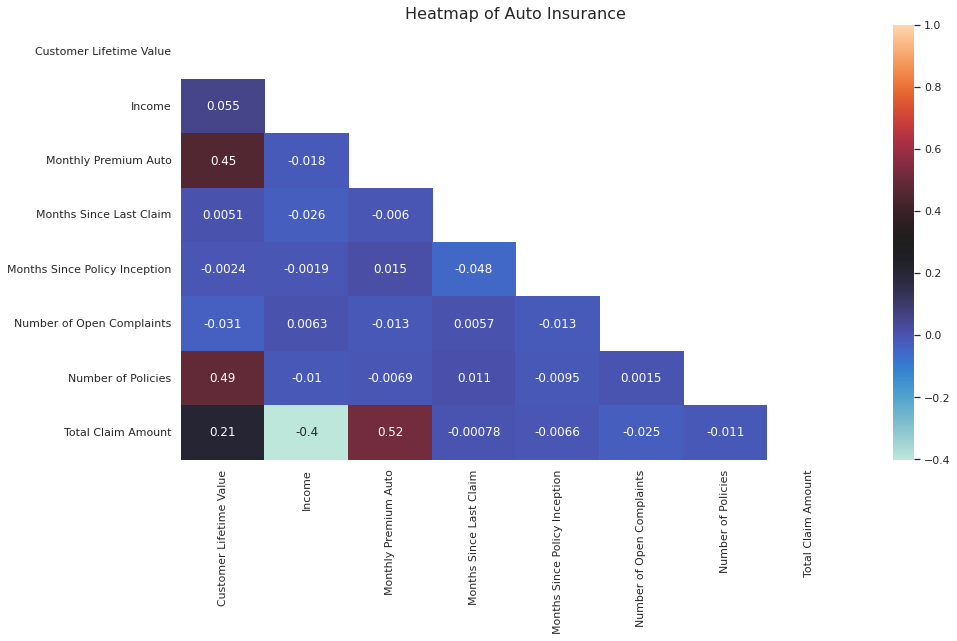

In [230]:
# Plot a heatmap to see correlation among numerical features
mask = np.zeros_like(Data.corr()) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15, 8))
plt.title('Heatmap of Auto Insurance', size=16)
sns.heatmap(Data.corr(method='spearman'), cmap='icefire', annot=True, mask=mask, vmax=1);

Kesimpulan :
1. Korelasi antara montly Premium Auto dngan Total Claim cukup besar
2. Tidak ada hubungan yang kuat antara income dengan Total Claim maupun Monthly Premium Auto

# 3.2 Modeling - **Monthly Premium Auto**



## 3.2.1 Library

In [231]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# linear regression model
import statsmodels.api as sm
from statsmodels.api import OLS

# non-linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# hyperparameter tuning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Save Model
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

## 3.2.2 Data Preprocessing

In [232]:
# import dataset
df = pd.read_csv('AutoInsurance.csv')

### Features Selection

> Dalam menentukan fitur apa saja yang akan dijadikan sebagai fitur model, kita akan menggunakan domain knowledge dari bidang asuransi dengan **mengasumsikan diri kita sebagai karyawan yang akan menangani calon nasabah baru**. Data-data yang dapat dikumpulkan dari calon nasabah baru akan kita jadikan sebagai variabel independen (X) dan jumlah premi yang harus dibayar setiap bulannya adalah variabel dependen (y).

> **Penentuan variabel independen (X)**:
1. **Customer** : No
2. **State** : Yes
3. **Customer Lifetime Value** : No
4. **Response** : No
5. **Coverage** : No
6. **Education** : Yes
7. **Effective To Date** : No
8. **EmploymentStatus** : Yes
9. **Gender** : Yes
10. **Income** : Yes
11. **Location Code** : Yes
12. **Marital Status** : Yes
13. **Monthly Premium Auto** : No (variabel dependen/target)
14. **Months Since Last Claim** : No
15. **Months Since Policy Inception** : No
16. **Number of Open Complaints** : No
17. **Number of Policies** : No
18. **Policy Type** : Yes
19. **Policy** : No (variabel sama seperti 'Policy Type')
20. **Renew Offer Type** : No
21. **Sales Channel** : Yes
22. **Total Claim Amount** : No
23. **Vehicle Class**	: Yes
24. **Vehicle Size** : Yes

> **Variabel independen** yang akan dimasukkan kedalam model sebagai fitur adalah sebagai berikut :  
State, Education, EmploymentStatus, Gender, Income, Location Code, Marital Status, Policy Type, Sales Channel, Vehicle Class, Vehicle Size

### Dummy Variables

> Dummy variables digunakan untuk mengubah variabel kategorik menjadi variabel numerik yang memiliki nilai 0 (no) atau 1 (yes)

In [233]:
# Select Features
df_features = df[['State',
                  'Education',
                  'EmploymentStatus',
                  'Gender',
                  'Income',
                  'Location Code',
                  'Marital Status',
                  'Policy Type',
                  'Sales Channel',
                  'Vehicle Class',
                  'Vehicle Size']]

In [234]:
# apply dummy variables for categorical variable
df_pre = pd.get_dummies(df_features)

In [235]:
# Final check for data preprocessing
df_pre

,Income,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,48767,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,43836,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
9130,21604,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9131,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9132,21941,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


# 3.2.3 Linear Regression Method

## Ordinary Least Squares (OLS) Modeling

In [236]:
# Define features and target
X = df_pre
y = df['Monthly Premium Auto']

In [237]:
# Features name
features_name = df_pre.columns
features_name

Index(['Income', 'State_Arizona', 'State_California', 'State_Nevada',
       'State_Oregon', 'State_Washington', 'Education_Bachelor',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Sales Channel_Agent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Four-Door Car', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car

In [238]:
# OLS Modeling
ols_model_premium = OLS(y, sm.add_constant(X))
result_premium = ols_model_premium.fit()

In [239]:
print(result_premium.summary())

                             OLS Regression Results                             
Dep. Variable:     Monthly Premium Auto   R-squared:                       0.770
Model:                              OLS   Adj. R-squared:                  0.769
Method:                   Least Squares   F-statistic:                     1015.
Date:                  Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                          09:37:40   Log-Likelihood:                -38570.
No. Observations:                  9134   AIC:                         7.720e+04
Df Residuals:                      9103   BIC:                         7.742e+04
Df Model:                            30                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

> Keynote :
1. Adj. R-Squared = 0.769 = 76.9%. Artinya model dapat menjelaskan variasi nilai jumlah premi perbulan sebesar 76.9%. Sisanya dapat dijelaskan oleh variabel lain yang tidak ada di dalam model.
1. Berdasarkan nilai p-value pada masing-masing feature, terdapat feature yang tidak signifikan (lebih besar dari 0.05) yaitu 'Income'


### Normality Test

In [116]:
result_premium.resid

0      -10.069631
1       16.218920
2       28.321988
3      -13.643012
4       -3.444972
          ...    
9129    -1.615135
9130    -1.115124
9131     7.675564
9132    18.259677
9133     0.529480
Length: 9134, dtype: float64

Text(0.5, 0, 'Residuals')

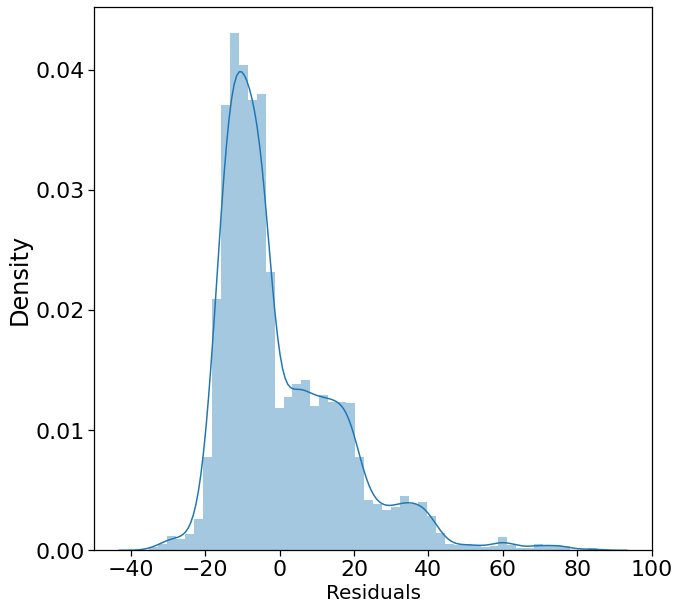

In [117]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result_premium.resid)
plt.xlabel('Residuals', fontsize = 20)

> Dari uji normalitas diatas, terlihat residual tidak menyebar normal,sehingga modeling menggunakan model non-linear regression.

### QQ plot

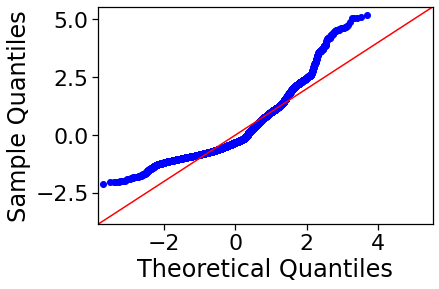

In [118]:
sm.qqplot(result_premium.resid, line = '45', fit = True)
plt.show()

> 

> Pada qqplot,terlihat data yang sebarannya menjulur ke kanan dan tidak mengikuti sebaran normal


### Residual Analysis Gauss-Markov Assumption

Text(0, 0.5, 'residual')

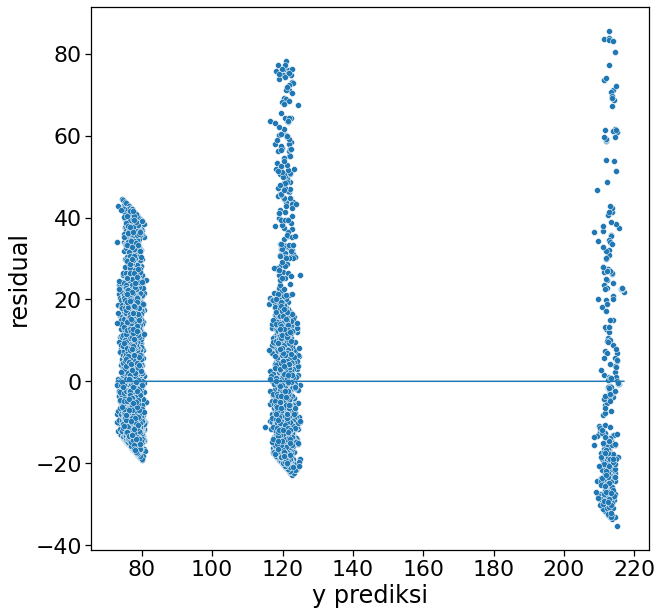

In [119]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = result_premium.fittedvalues, y = result.resid)
sns.lineplot(result_premium.fittedvalues, 0)
plt.xlabel('y prediksi')
plt.ylabel('residual')

> Dari hasil scatter plot diatas, interpretasi outputnya adalah:  
1. Residual tidak menyebar di sekitar nilai 0. Hal ini menandakan tidak terpenuhinya asumsi rata-rata error bernilai 0.
1. Ketika nilai prediksi membesar, error semakin menyebar luas. Hal ini menandakan dilanggarnya asumsi kehomogenan ragam.

# 3.2.4 Non-Linear Regression Methods

> Setelah kita gagal membuat model dengan metode linear regresi (beberapa asumsi regresi linear tidak terpenuhi) cara lain yang dapat kita gunakan adalah dengan menggunakan metode non-linear regresi. Pada metode ini kita akan mencoba beberapa model sekaligus dan memilih model mana yang terbaik hasil scoringnya.

## Model Selection

In [126]:
# Splitting Data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

In [127]:
# model
ranfor = RandomForestRegressor(random_state = 2020)
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor(random_state = 2020)
xgboost = XGBRegressor(random_state = 2020)

In [128]:
# cross validation
ranfor_cv = cross_val_score(ranfor, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')
knnreg_cv = cross_val_score(knnreg, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')
treereg_cv = cross_val_score(treereg, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')
xgboost_cv = cross_val_score(xgboost, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')

[06:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [129]:
# Cross Validation Score
print('Hasil Cross Validasi')
print('CV ranfor',ranfor_cv)
print('CV knnreg',knnreg_cv)
print('CV treereg',treereg_cv)
print('CV xgboost',xgboost_cv)

Hasil Cross Validasi
CV ranfor [-12.72585913 -12.69135774 -12.28180356 -12.76415316 -12.38303372]
CV knnreg [-23.84377565 -22.84227086 -22.53073238 -23.74647502 -23.00205339]
CV treereg [-15.80090059 -15.80786594 -14.89961214 -15.46205524 -15.89583456]
CV xgboost [-13.16877747 -12.84847098 -12.37515136 -13.0913886  -12.61281395]


In [130]:
# Cross Validation Score Standard Deviation
print('Standar Deviasi Hasil Cross Validasi')
print('CV ranfor',ranfor_cv.std())
print('CV knnreg',knnreg_cv.std())
print('CV treereg',treereg_cv.std())
print('CV xgboost',xgboost_cv.std())

Standar Deviasi Hasil Cross Validasi
CV ranfor 0.1973453413410344
CV knnreg 0.5153471579461208
CV treereg 0.3679898017332322
CV xgboost 0.2956085788215403


In [131]:
# Cross Validation Score Mean
print('Rata-rata Hasil Cross Validasi')
print('CV ranfor',ranfor_cv.mean())
print('CV knnreg',knnreg_cv.mean())
print('CV treereg',treereg_cv.mean())
print('CV xgboost',xgboost_cv.mean())

Rata-rata Hasil Cross Validasi
CV ranfor -12.56924146273184
CV knnreg -23.19306145838307
CV treereg -15.57325369166285
CV xgboost -12.819320469005834


> Dari hasil modeling diatas dengan menggunakan cross validasi = 5, kita menemukan model dengan rata-rata skor MAE yang paling terkecil yaitu pada model **Random Forest Regressor dengan rata-rata skor MAE sebesar 12.56 dengan variance yang terindikasi tidak besar (0.19)**.  
  
> Maka model yang akan kita gunakan berikutnya adalah model Random Forest Regressor dengan kita melakukan hyperparameter tuning untuk menemukan skor yang lebih baik lagi.

## Random Forest

### Hyperparameter Tuning

In [132]:
ranfor = RandomForestRegressor()

> Pertama kita lihat parameter default apa saja yang digunakan pada RandomForestRegressor

In [133]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ranfor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


> Parameter pada RandomForestRegressor sangatlah banyak dan kita dapat melakukan parameter tuning sesuai dengan kemauan kita sendiri. Karena keterbatasan waktu dan tools yang digunakan, pada kasus kali ini, kita hanya akan merubah beberapa parameter yang ada pada RandomForestRegressor seperti :  
1. **n_estimators** = Menunjukkan banyaknya pohon dalam forest
1. **max_features** = Jumlah fitur yang perlu dipertimbangkan saat mencari pemisahan terbaik
1. **max_depth** =  Menunjukkan kedalaman maksimum pohon
1. **min_samples_split** = Jumlah sampel minimum yang diperlukan untuk membelah simpul internal
1. **min_samples_leaf** = Jumlah minimum sampel yang diperlukan berada pada simpul daun)
1. **bootstrap** = seluruh dataset digunakan untuk membangun setiap pohon.

In [134]:
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


> Pada hyperparameter tuning ini, kita menggunakan metode RandomizedSearchCV untuk menemukan parameter terbaik secara random (sebanyak 100 kombinasi) dengan cross validasi = 3.

In [143]:
# search across 100 different combinations, and use all available cores
ranfor_random = RandomizedSearchCV(estimator = ranfor, 
                                   param_distributions = random_grid, 
                                   n_iter = 100, # 100 random combination
                                   cv = 3, 
                                   verbose = 2,
                                   scoring = 'neg_mean_absolute_error', 
                                   random_state = 2020, 
                                   n_jobs = -1)

> **Note :** **Model fitting bisa berjalan sangat lama (sekitar 1 jam), apabila tidak ingin menunggu model fitting sampai beres, bisa skip code-code dibawah ini dan langsung ke load hasil cv nya saja dibawah**

In [144]:
# Fit the random search model
ranfor_random.fit(X_train_val, y_train_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 64.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [145]:
# best parameter tuning
ranfor_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [146]:
# best score MAE
ranfor_random.best_score_

-12.531148052818056

In [147]:
# RandomizedCV Result Data rank test score 1-10
pd.set_option('max_colwidth', None)
hasil_randomcv = pd.DataFrame(ranfor_random.cv_results_).sort_values(['rank_test_score'], ascending = True)
hasil_randomcv.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
10,17.149238,0.106224,1.129315,0.020529,1400,2,2,sqrt,90,False,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}",-12.473173,-12.632481,-12.487791,-12.531148,0.071901,1
42,14.425991,0.070429,0.895814,0.029898,1200,2,2,sqrt,30,False,"{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.474145,-12.635362,-12.488429,-12.532645,0.072866,2
31,16.263191,0.057589,1.035424,0.015713,1400,5,2,sqrt,50,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}",-12.489344,-12.625897,-12.485421,-12.533554,0.065316,3
49,16.342403,0.109655,1.030449,0.038851,1400,5,2,sqrt,30,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.488952,-12.626012,-12.488172,-12.534379,0.064796,4
27,21.171600,0.061948,1.341668,0.074117,1800,5,2,sqrt,110,False,"{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}",-12.490898,-12.630441,-12.485383,-12.535574,0.067119,5
11,22.666680,0.868219,0.472003,0.024388,600,2,2,auto,50,True,"{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}",-12.461067,-12.625400,-12.527046,-12.537837,0.067521,6
1,20.756812,0.272674,0.408482,0.001980,600,5,2,auto,100,True,"{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.461087,-12.632780,-12.524426,-12.539431,0.070892,7
64,50.272614,0.377260,1.030335,0.008897,1400,2,2,auto,100,True,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.456201,-12.627718,-12.539704,-12.541207,0.070030,8
78,14.372772,0.119451,0.295273,0.005789,400,2,2,auto,70,True,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}",-12.465495,-12.634747,-12.527429,-12.542557,0.069920,9
15,7.231081,0.090149,0.152058,0.001289,200,2,2,auto,70,True,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}",-12.451996,-12.636327,-12.540307,-12.542877,0.075275,10


In [148]:
# Save randomizedcv tuning result to csv
hasil_randomcv.to_csv('RandomCV_Result_MonthlyPremiumAuto.csv')

> **Note : Untuk load hasil cvnya saja dapat gunakan code dibawah dengan menghapus multipe quote (' ' ')**

In [34]:
# Load hasil randomizedcv dan show top 10 best score test
'''hasil_randomcv = pd.read_csv('RandomCV_Result_MonthlyPremiumAuto.csv')
pd.set_option('max_colwidth', None)
hasil_randomcv.sort_values(['rank_test_score'], ascending = True)
hasil_randomcv.head(10)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10,16.706421,0.147252,1.006910,0.012181,1400,2,2,sqrt,90.0,False,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}",-12.478448,-12.632380,-12.483801,-12.531543,0.071336,1
1,42,13.963178,0.029105,0.839525,0.025076,1200,2,2,sqrt,30.0,False,"{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.491109,-12.626884,-12.477290,-12.531761,0.067498,2
2,49,15.735830,0.069616,0.946399,0.011051,1400,5,2,sqrt,30.0,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.485670,-12.631059,-12.485641,-12.534123,0.068544,3
3,27,20.144990,0.152013,1.226368,0.036031,1800,5,2,sqrt,110.0,False,"{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}",-12.481167,-12.634827,-12.496193,-12.537396,0.069167,4
4,15,7.030140,0.006424,0.139226,0.004071,200,2,2,auto,70.0,True,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}",-12.431271,-12.616236,-12.564787,-12.537431,0.077950,5
5,78,14.042299,0.100378,0.278397,0.002540,400,2,2,auto,70.0,True,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}",-12.467208,-12.622122,-12.523456,-12.537595,0.064029,6
6,31,15.554980,0.026111,0.970576,0.019253,1400,5,2,sqrt,50.0,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}",-12.487546,-12.635325,-12.493860,-12.538910,0.068224,7
7,64,49.514923,0.346089,1.004308,0.015178,1400,2,2,auto,100.0,True,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.450107,-12.637047,-12.532997,-12.540050,0.076480,8
8,46,7.036610,0.048294,0.137143,0.001551,200,2,2,auto,NaN,True,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}",-12.470098,-12.615555,-12.537134,-12.540929,0.059443,9
9,11,21.484671,0.075374,0.453059,0.023925,600,2,2,auto,50.0,True,"{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}",-12.454696,-12.640638,-12.528736,-12.541356,0.076433,10


## Compare Before and After Hyperparameter Tuning

In [149]:
# Data splitting for benchmarking
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 0.25, # sama seperti 20% dari seluruh data untuk data test
    random_state = 2020
)

### Before Tuning

In [150]:
ranfor = RandomForestRegressor(random_state = 2020) 
ranfor.fit(X_train,y_train)
y_pred = ranfor.predict(X_val) 
score_before = mean_absolute_error(y_val, y_pred)
print('Model skor MAE sebelum tuning =', score_before)

Model skor MAE sebelum tuning = 12.420616468658752


> **Model Random Forest Regressor sebelum tuning (menggunakan default parameter) memiliki skor MAE sebesar 12.42**

### After Tuning

In [151]:
ranfor_after = RandomForestRegressor(bootstrap = False,
                                     max_depth = 90,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 2,
                                     min_samples_split = 2,
                                     n_estimators = 1400,
                                     random_state = 2020) # with best parameter after tuning
ranfor_after.fit(X_train,y_train)
y_pred_after = ranfor_after.predict(X_val)
score_after = mean_absolute_error(y_val, y_pred_after)
print('Model skor MAE setelah tuning =', score_after)

Model skor MAE setelah tuning = 12.277389086309286


> **Setelah model Random Forest Regressor kita tuning dengan menggunakan randomizedcv, model sekarang memiliki skor MAE yang lebih baik yaitu sebesar 12.27**

### Model Improvement

In [152]:
improvement = abs(100 *((score_after - score_before) / score_before))
improvement

1.15314229942511

> **Terjadi peningkatan model random forest dari sebelum ke sesudah tuning sebesar 1.15%**

## Features Importances

> Selanjutnya kita melihat nilai features importances dari setiap feature yang kita masukkan kedalam model dan kita tentukan fitur mana yang paling mempengaruhi prediksi jumlah premi perbulan calon nasabah baru.

In [153]:
# Create an importance table variable
importance_table_premium = pd.DataFrame({
    'imp':ranfor_after.feature_importances_
}, index = features_name)

importance_table_premium.sort_values(['imp'], ascending= False)

,imp
Vehicle Class_Luxury Car,0.210860
Vehicle Class_Luxury SUV,0.192581
Vehicle Class_Four-Door Car,0.172443
Vehicle Class_SUV,0.124330
Vehicle Class_Two-Door Car,0.107071
Vehicle Class_Sports Car,0.041383
Income,0.034404
Sales Channel_Agent,0.005736
Gender_F,0.005211
Gender_M,0.005109


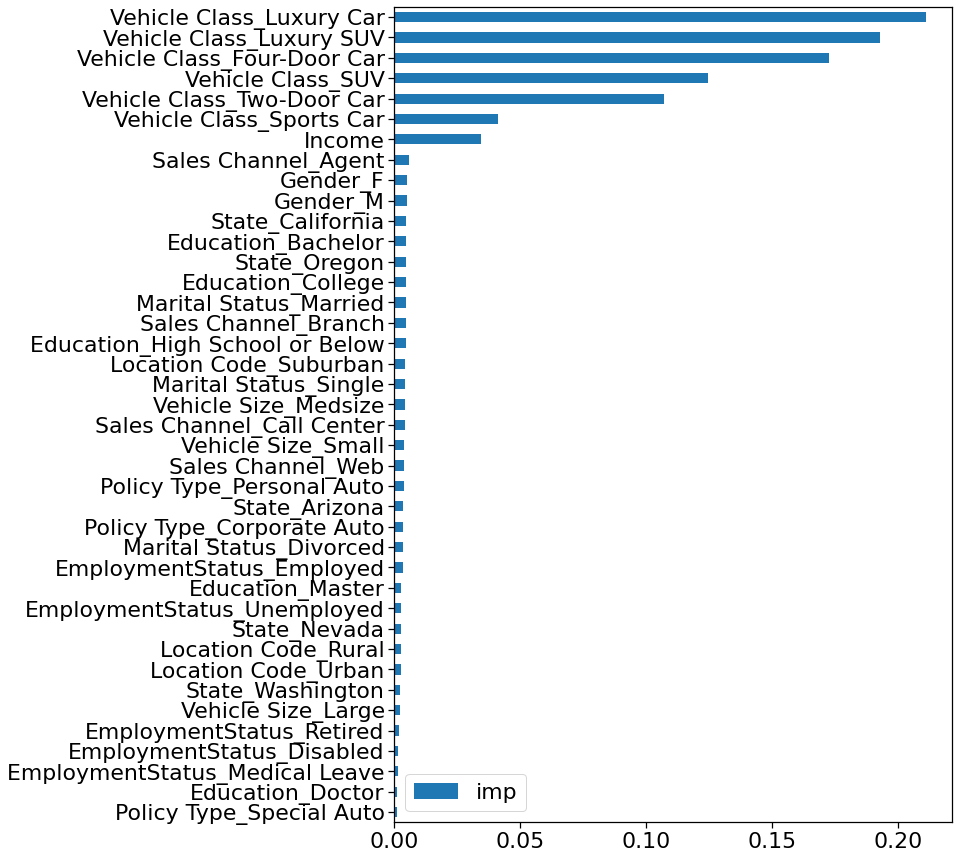

In [141]:
importance_table_premium.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

> Dari hasil features importance diatas, kita dapat melihat fitur yang secara keseluruhan memiliki pengaruh yang paling tinggi terhadap penentuan jumlah premi perbulan nasabah :
1. **Vehicle Class = 83%**
2. **Income = 3%**
3. **Fitur lainnya masing-masing <1%**

# 3.2.5 Model Fitting to Data Test

> Kita lakukan model fitting terhadap data test untuk melihat apakah model mengalami overfitting

In [154]:
# Model Fitting
ranfor_after.fit(X_train_val,y_train_val) 
y_pred_test = ranfor_after.predict(X_test) 
print('Model skor MAE setelah tuning pada data test =', mean_absolute_error(y_test, y_pred_test))

Model skor MAE setelah tuning pada data test = 11.90669713534968


> Dari skor MAE pada model yang difitting kedalam data test, terlihat skor MAEnya sebesar **11.90**, tidak jauh berbeda apabila kita bandingkan dengan skor MAE dengan model yang difitting menggunakan data validasi yaitu sebesar **12.27**.  
  
> Dari kedua hasil tersebut, dapat kita asumsikan **model yang kita buat tidak mengalami overfitting**.

# 3.2.6 Model Deployment

## Save Model


In [60]:
model_final_premium = ranfor_after.fit(X_train, y_train)

pickle.dump(model_final_premium, open('MonthlyPremiumAuto.sav', 'wb'))

**Model sudah kita simpan dengan format (.sav) dan kita dapat menggunakan model ini untuk memprediksi jumlah premi perbulan calon nasabah baru dengan memanggil nama modelnya yaitu 'MonthlyPremiumAuto.sav'**

## Load Model

In [61]:
filename = 'MonthlyPremiumAuto.sav'
loaded_model_premium = pickle.load(open(filename, 'rb'))

In [62]:
loaded_model_premium.predict(X_test)

array([122.66012676,  78.82769469,  74.0813593 , ...,  79.91321055,
        81.68102151, 122.68684496])

In [63]:
mean_absolute_error(y_test, loaded_model_premium.predict(X_test))

12.076746608306689

# 3.3 Modeling - **Total Claim Amount**

> Setelah mendapatkan angka prediksi Monthly Premium Auto, maka langkah berikutnya adalah memprediksi Total Claim Amount. Tujuannya adalah untuk memprediksi berapa perkiraan Total Claim Amount customer asuransi berdasarkan profile dan juga Monthly Premium Auto yang telah ditentukan dari model.
  
> Perusahaan akan dapat memprediksi total claim dari seorang customer sehingga perusahaan dapat mengetahui seberapa besar CLV customer jika dibandingkan dengan total claim, apakah CLV lebih besar dari total claim (profit) atau malah CLV lebih kecil dari total claim (rugi).

## 3.3.1 Data Preprocessing

### Features Selection

> Feature yang digunakan pada prediksi **Total Claim Amount**:
1. Income
2. State
3. EmoploymentStatus
4. Gender
5. Location Code
6. Marital Status
7. Sales Channel
8. Vehicle Class
9. Vehicle Size
10. Policy Type
11. **Coverage**
12. Education
13. **Monthly Premium Auto**

> Feature yang digunakan sama dengan ketika melakukan prediksi Monthly Premium Auto, namun bedanya adalah menambahkan feature **Coverage** dan **Monthly Premium Auto** disini.

### Dummy Variables

> Dummy variables digunakan untuk mengubah variabel kategorik menjadi variabel numerik yang memiliki nilai 0 (no) atau 1 (yes)

In [156]:
# Select Features
df_features_claim = df[['Total Claim Amount',
                  'Income',
                  'State',
                  'EmploymentStatus',
                  'Gender',
                  'Location Code',
                  'Marital Status',
                  'Sales Channel',
                  'Vehicle Class',
                  'Vehicle Size',
                  'Policy Type',
                  'Coverage',
                  'Education',
                  'Monthly Premium Auto'
                  ]]

In [157]:
df_dummy_claim = pd.get_dummies(df_features_claim)

In [158]:
df_dummy_claim.head()

,Total Claim Amount,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,384.811147,56274,69,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1,1131.464935,0,94,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
2,566.472247,48767,108,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0
3,529.881344,0,106,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,138.130879,43836,73,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


# 3.3.2 Linear Regression Method

## Ordinary Least Squares (OLS) Modeling

In [159]:
# Get features names
features_name_claim = df_dummy_claim.columns.drop('Total Claim Amount') # drop target

In [160]:
features_name_claim

Index(['Income', 'Monthly Premium Auto', 'State_Arizona', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Sales Channel_Agent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Four-Door Car', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car',
       'Vehicle Size_Large', 'Vehicle Size_Medsize', 'Vehicle Size_Small',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Coverage_Basic', 'Coverage_E

In [161]:
sm_lm_claim = OLS(df_dummy_claim['Total Claim Amount'], sm.add_constant(df_dummy_claim[features_name_claim]))
result_claim = sm_lm_claim.fit()

In [162]:
print(result_claim.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     928.3
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        07:55:39   Log-Likelihood:                -58033.
No. Observations:                9134   AIC:                         1.161e+05
Df Residuals:                    9100   BIC:                         1.164e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Berdasarkan result summary di atas, beberapa key notes yang dapat disimpulkan adalah sebagai berikut:

1. R2 sebesar 0.771 -> feature yang digunakan dapat menjelaskan prediksi Total Claim Amount sebesar 77.1%
2. Berdasarkan nilai p-value pada masing-masing feature, beberapa feature tidaklah signifikan (lebih besar dari 0.05), seperti:
  - State_California
  - State_Nevada
  - State_Washington
  - EmploymentStatus_Medical Leave
  - Gender_M
  - Sales Channel_Branch
  - Sales Channel_Web
  - Vehicle Class_Four-Door Car
  - Vehicle Class_Luxury Car
  - Vehicle Class_Luxury SUV
  - Vehicle Class_Two-Door Car
  - Vehicle Size_Large 
  - Vehicle Size_Small 
  - Policy Type_Special Auto
  - Coverage_Basic  
  - Coverage_Premium
  - Education_Bachelor

### Normality Test

Text(0.5, 0, 'Residuals')

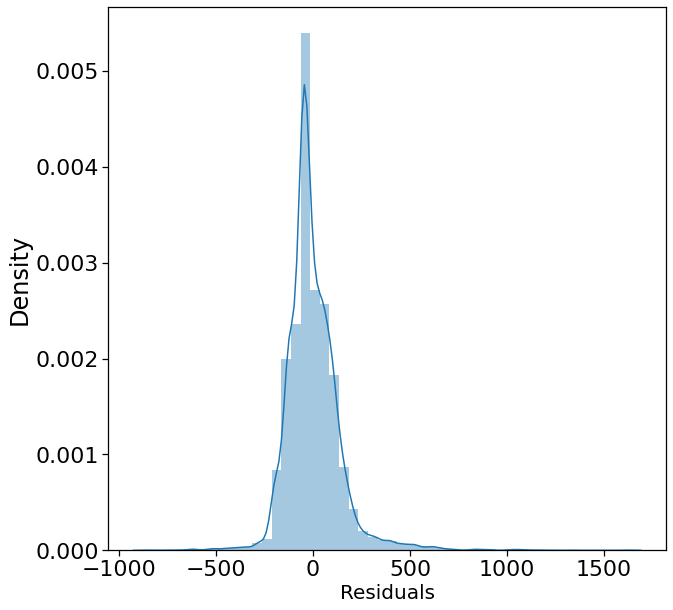

In [163]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result_claim.resid)
plt.xlabel('Residuals', fontsize = 20)

### QQ Plot

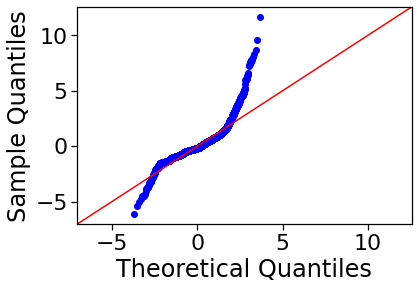

In [164]:
sm.qqplot(result_claim.resid, line = '45', fit = True)
plt.show()

### Residual Analysis Gauss-Markov Assumption

Text(0, 0.5, 'Residuals')

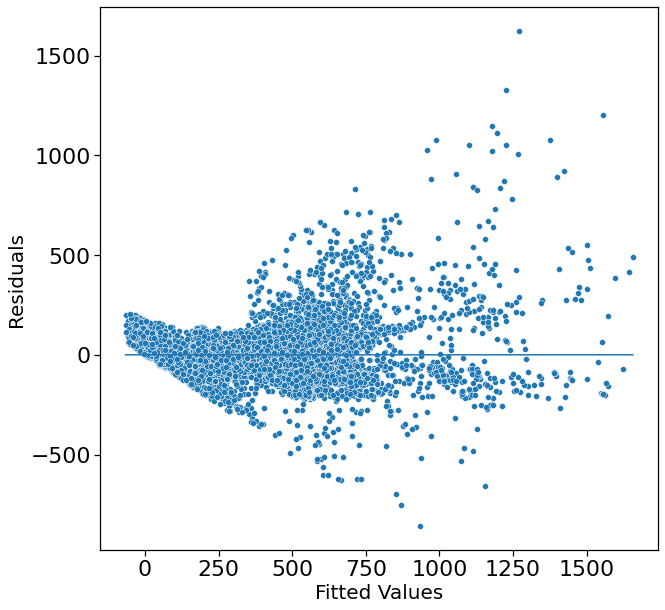

In [165]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result_claim.fittedvalues,result_claim.resid)
sns.lineplot(result_claim.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

**Summary Normality Assumption & Gauss-Markov**

- Data tidak memiliki residual normalitas, sehingga modeling menggunakan model non linear regression
- Pada qqplot, terdapat deviasi pada sumbu X (Theoretical Quantilers) semakin mendekati -5 atau semakin mendekati 5
- Berdasarkan asumsi Gauss-Markov, error varians pada data cenderung tidak konstan jika nilai observasi semakin besar 

# 3.3.3 Non-Linear Regression Methods

## Data Splitting & Scaling

In [168]:
X_claim = df_dummy_claim[features_name_claim]
y_claim = df_dummy_claim['Total Claim Amount'].astype(int)

In [169]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_claim, 
    y_claim, 
    test_size = 0.2, 
    random_state = 2021)

In [170]:
scaler = RobustScaler()
scaler.fit(X_train_val)
X_train_scaled = scaler.transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

Scaler digunakan untuk scaling feature dengan data numerik seperti Income dan Monthly Premium Auto.

Scaler yang digunakan adalah Robust Scaler dikarenakan data AutoInsurance tidaklah normal dan memiliki outlier, sehingga tidak cocok jika menggunakan Standard Scaler dan Min Max Scaler.

## Model Selection

In [171]:
# model
ranfor = RandomForestRegressor(n_estimators = 20, max_features = 4, max_depth = 3, random_state = 2021)
knnreg = KNeighborsRegressor(weights = 'uniform')
treereg = DecisionTreeRegressor(max_depth = 3, random_state = 2021)
xgboost = XGBRegressor(random_state = 2021)

In [172]:
# cross validation
skfold = StratifiedKFold(n_splits = 5)

ranfor_cv = cross_val_score(ranfor, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')
knnreg_cv = cross_val_score(knnreg, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')
treereg_cv = cross_val_score(treereg, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')
xgboost_cv = cross_val_score(xgboost, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')

[07:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [173]:
# Cross Validation Score
print('Hasil Cross Validasi')
print('CV ranfor',ranfor_cv)
print('CV knnreg',knnreg_cv)
print('CV treereg',treereg_cv)
print('CV xgboost',xgboost_cv)

Hasil Cross Validasi
CV ranfor [-145.74709936 -143.0737574  -151.43148456 -147.26028741 -150.82093288]
CV knnreg [-91.00273598 -93.97948016 -93.00027379 -92.76933607 -92.36016427]
CV treereg [-102.92738748 -101.12155906 -103.69361232  -99.61427059 -103.53455224]
CV xgboost [-77.08487615 -80.36064811 -78.3955784  -78.64134231 -78.04617436]


In [174]:
# Cross Validation Score Standard Deviation
print('Standar Deviasi Hasil Cross Validasi')
print('CV ranfor',ranfor_cv.std())
print('CV knnreg',knnreg_cv.std())
print('CV treereg',treereg_cv.std())
print('CV xgboost',xgboost_cv.std())

Standar Deviasi Hasil Cross Validasi
CV ranfor 3.1326649157700235
CV knnreg 0.9693425090994443
CV treereg 1.574018539615621
CV xgboost 1.0678260461755866


In [175]:
# Cross Validation Score Mean
print('Rata-rata Hasil Cross Validasi')
print('CV ranfor',ranfor_cv.mean())
print('CV knnreg',knnreg_cv.mean())
print('CV treereg',treereg_cv.mean())
print('CV xgboost',xgboost_cv.mean())

Rata-rata Hasil Cross Validasi
CV ranfor -147.66671232089462
CV knnreg -92.62239805391619
CV treereg -102.17827633794575
CV xgboost -78.50572386655412


**Summary Model Selection**

- Berdasarkan mean, model yang terpilih adalah XGBoost Regressor.
- Metric yang digunakan adalah MAE karena data memiliki outlier
- XGBoost Regressor mean -> -78.505 (paling baik, mendekati angka 0)
- XGBoost Regressor std -> -1.068 (indikasi variance tidak besar)

## XGBoost Regressor Fitting Model

In [176]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 0.25, 
    random_state = 2021)

In [177]:
model = XGBRegressor(random_state = 2021)

In [178]:
model.fit(X_train, y_train)

[08:04:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2021,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Hyperparameter Tuning

In [179]:
hyperparam_max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
hyperparam_n_estimator = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
skfold = StratifiedKFold(n_splits = 5)
 
best_score = -1000 
cv_score_validation_fold = [] 
 
for i in hyperparam_max_depth:
  for a in hyperparam_n_estimator:
    xgboost = XGBRegressor(max_depth = i, n_estimators = a, random_state = 2021)
    cv_score = cross_val_score(xgboost, X_train_val, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error').mean() 
    cv_score_validation_fold.append(cv_score)
 
    if cv_score > best_score: 
      best_score = cv_score 
      best_params_max_depth = {'max depth':i}
      best_params_n_estimator = {'n estimator':a}

[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [180]:
best_params_max_depth

{'max depth': 10}

In [181]:
best_params_n_estimator

{'n estimator': 30}

In [182]:
best_score

-73.8686805440061

In [183]:
print('best param max depth:', best_params_max_depth)
print('best param n estimator:', best_params_n_estimator)

best param max depth: {'max depth': 10}
best param n estimator: {'n estimator': 30}


**Summary Hyperparameter Tuning**

- parameter max depth terbaik -> 10
- parameter n estimator terbaik -> 30

## 3.3.4 Model Before Tuning

In [194]:
xgboost_before = XGBRegressor(max_depth = 3, n_estimators = 10, random_state = 2020) 
model_1 = xgboost_before
xgboost_before.fit(X_train_val,y_train_val) 
y_pred = xgboost_before.predict(X_test) 
print(mean_absolute_error(y_test, y_pred))

[08:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
153.61604257718292


In [195]:
importance_table = pd.DataFrame({
    'imp':model_1.feature_importances_
}, index = features_name_claim)

In [207]:
importance_table.sort_values(['imp'], ascending= False)

,imp
Location Code_Suburban,0.823531
Location Code_Rural,0.124382
Monthly Premium Auto,0.015054
Marital Status_Single,0.012348
Policy Type_Personal Auto,0.001250
Income,0.001189
Vehicle Class_Luxury Car,0.001118
EmploymentStatus_Retired,0.001018
EmploymentStatus_Employed,0.000993
Coverage_Premium,0.000987


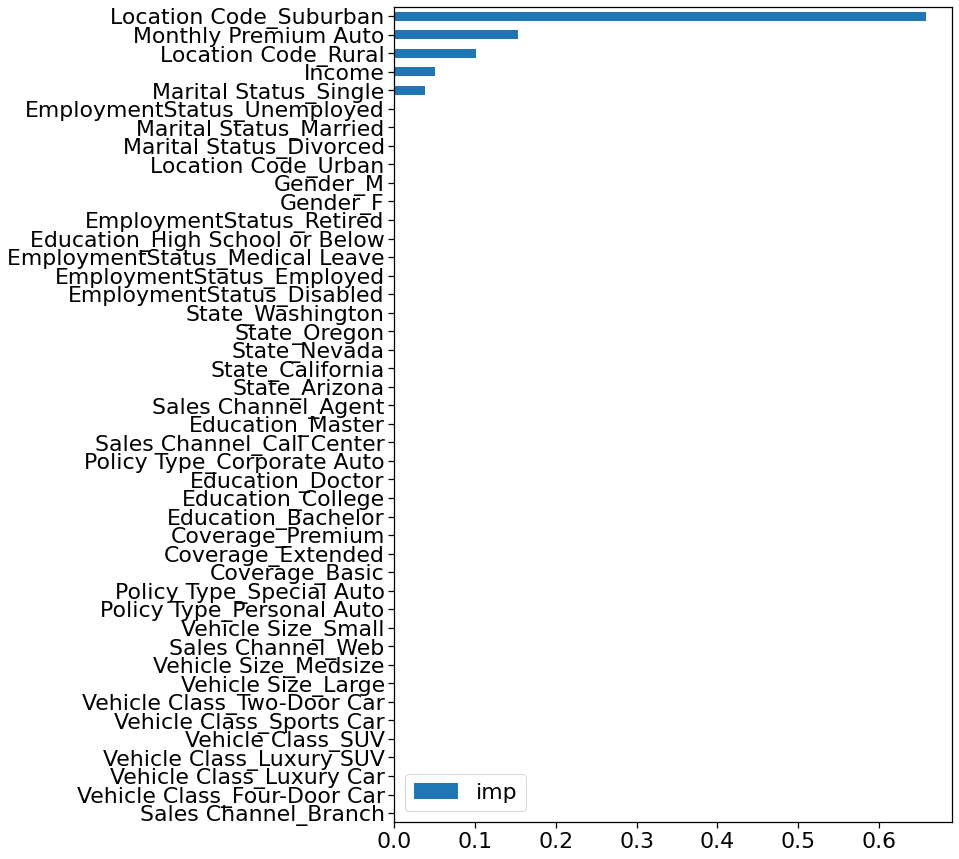

In [187]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

## 3.3.5 Model After Tuning

In [197]:
xgboost_after = XGBRegressor(max_depth = 10, n_estimators = 30, random_state = 2020) # best parameter
model_2 = xgboost_after
xgboost_after.fit(X_train_val,y_train_val) 
y_pred = xgboost_after.predict(X_test) 
print(mean_absolute_error(y_test, y_pred))

[08:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
72.1231644395015


In [208]:
importance_table = pd.DataFrame({
    'imp':model_2.feature_importances_
}, index = features_name_claim)

In [209]:
importance_table.sort_values(['imp'], ascending= False)

,imp
Location Code_Suburban,0.815104
Location Code_Rural,0.127143
Monthly Premium Auto,0.017107
Marital Status_Single,0.012750
EmploymentStatus_Employed,0.001565
Income,0.001296
Vehicle Size_Small,0.001282
Coverage_Extended,0.001272
Policy Type_Corporate Auto,0.001157
Vehicle Size_Large,0.000968


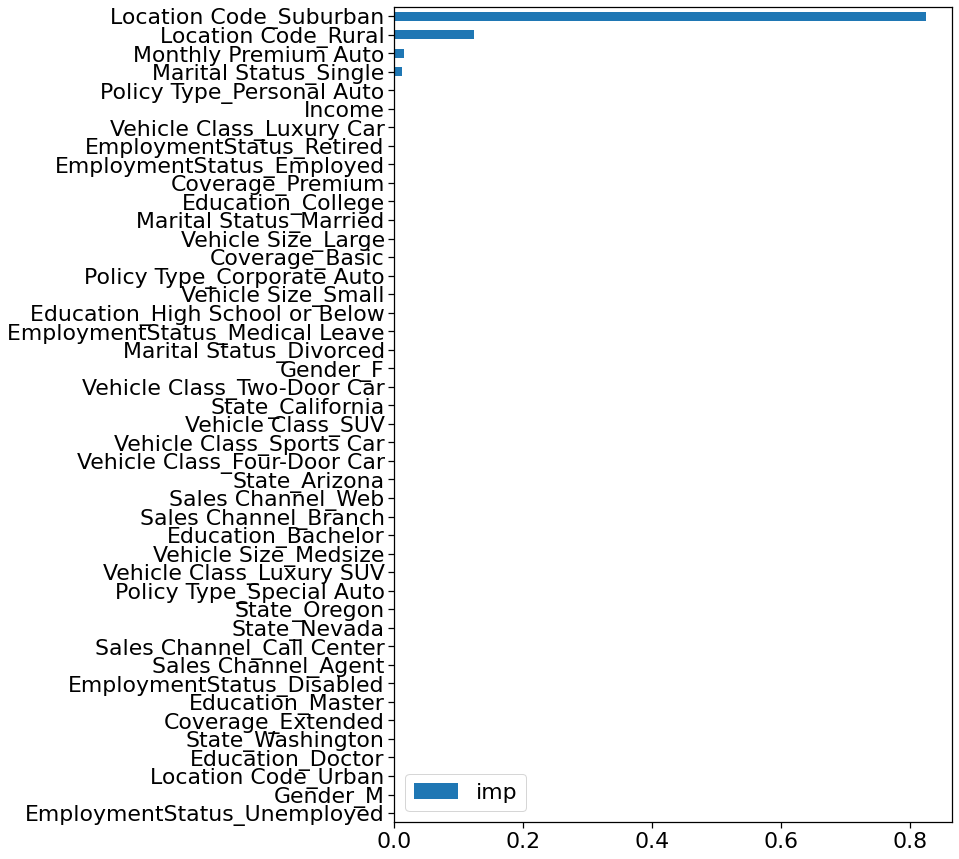

In [200]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

**Summary Model Before & After Tuning**

- Performance model after tuning lebih baik dibandingkan before tuning
- **MAE model after tuning -> 72.12** (menurun dibandingkan before tuning)
- Feature importance model after tuning paling dominan adalah Location Code_Suburban, kemudian diikuti oleh Location Code_Rural, Monthly Premium Auto, dan Marital Status_Single
- Keempat feature tersebut penting dalam memprediksi Total Claim Amount, keempat feature jika ditotal memiliki importance sebesar 0.971 (97.1%) 

## 3.3.6 Model Deployment

### Save File

In [201]:
model_final_claim = xgboost_after.fit(X_train, y_train)

pickle.dump(model_final_claim, open('TotalClaimAmount.sav', 'wb'))

[08:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Model sudah kita simpan dengan format (.sav) dan kita dapat menggunakan model ini untuk memprediksi total klaim asuransi calon nasabah baru dengan memanggil nama modelnya yaitu 'TotalClaimAmount.sav'**

### Load File

In [204]:
filename = 'TotalClaimAmount.sav'
loaded_model_claim = pickle.load(open(filename, 'rb'))

[08:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [205]:
loaded_model_claim.predict(X_test)

array([ 191.4146 ,  363.36496,  402.40186, ...,  333.6904 , 1436.2297 ,
        240.05553], dtype=float32)

In [206]:
mean_absolute_error(y_test, loaded_model_claim.predict(X_test))

73.69702759060497